<a href="https://colab.research.google.com/github/Elwing-Chou/ximen1129/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


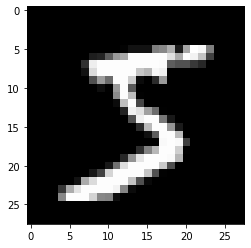

In [3]:
# matplotlib colormap
import pandas as pd
import matplotlib.pyplot as plt
idx = 0
pd.DataFrame(x_train[idx])
# , cmap="PiYG_r"
print(y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [4]:
from tensorflow.keras.models import Sequential
# 全連接層
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 多個輸出(多元分類): CategoricalCrossEntropy sigma(pilog1/qi)
# 單個輸出(二元分類): BinaryCrossEntropy plog1/q + (1-p)log1/(1-q)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# -1:自動算
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


In [ ]:
# 一輪: 60000 * 0.9 / 100 -> 540梯度下降
# epochs: 整份資料看幾輪
# verbose: 0(quiet), 1(完整), 2(無進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mnist.h5", save_best_only=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

In [9]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0712 - accuracy: 0.9771


[0.0712108239531517, 0.9771000146865845]

In [15]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
# tensorflow: one-hot sklearn: original
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(True)".format(i) for i in range(10)],
      columns=["{}(Pred)".format(i) for i in range(10)])

,0(Pred),1(Pred),2(Pred),3(Pred),4(Pred),5(Pred),6(Pred),7(Pred),8(Pred),9(Pred)
0(True),972,0,2,2,0,0,1,1,2,0
1(True),0,1127,3,0,0,1,2,0,2,0
2(True),0,3,1011,5,2,0,2,5,4,0
3(True),0,1,3,988,0,3,0,3,5,7
4(True),0,1,6,0,960,0,1,4,1,9
5(True),3,1,0,11,1,866,2,3,5,0
6(True),8,3,1,1,5,4,935,0,1,0
7(True),1,6,7,5,0,0,0,999,4,6
8(True),5,0,6,9,2,2,1,2,944,3
9(True),2,7,0,9,7,5,1,4,5,969


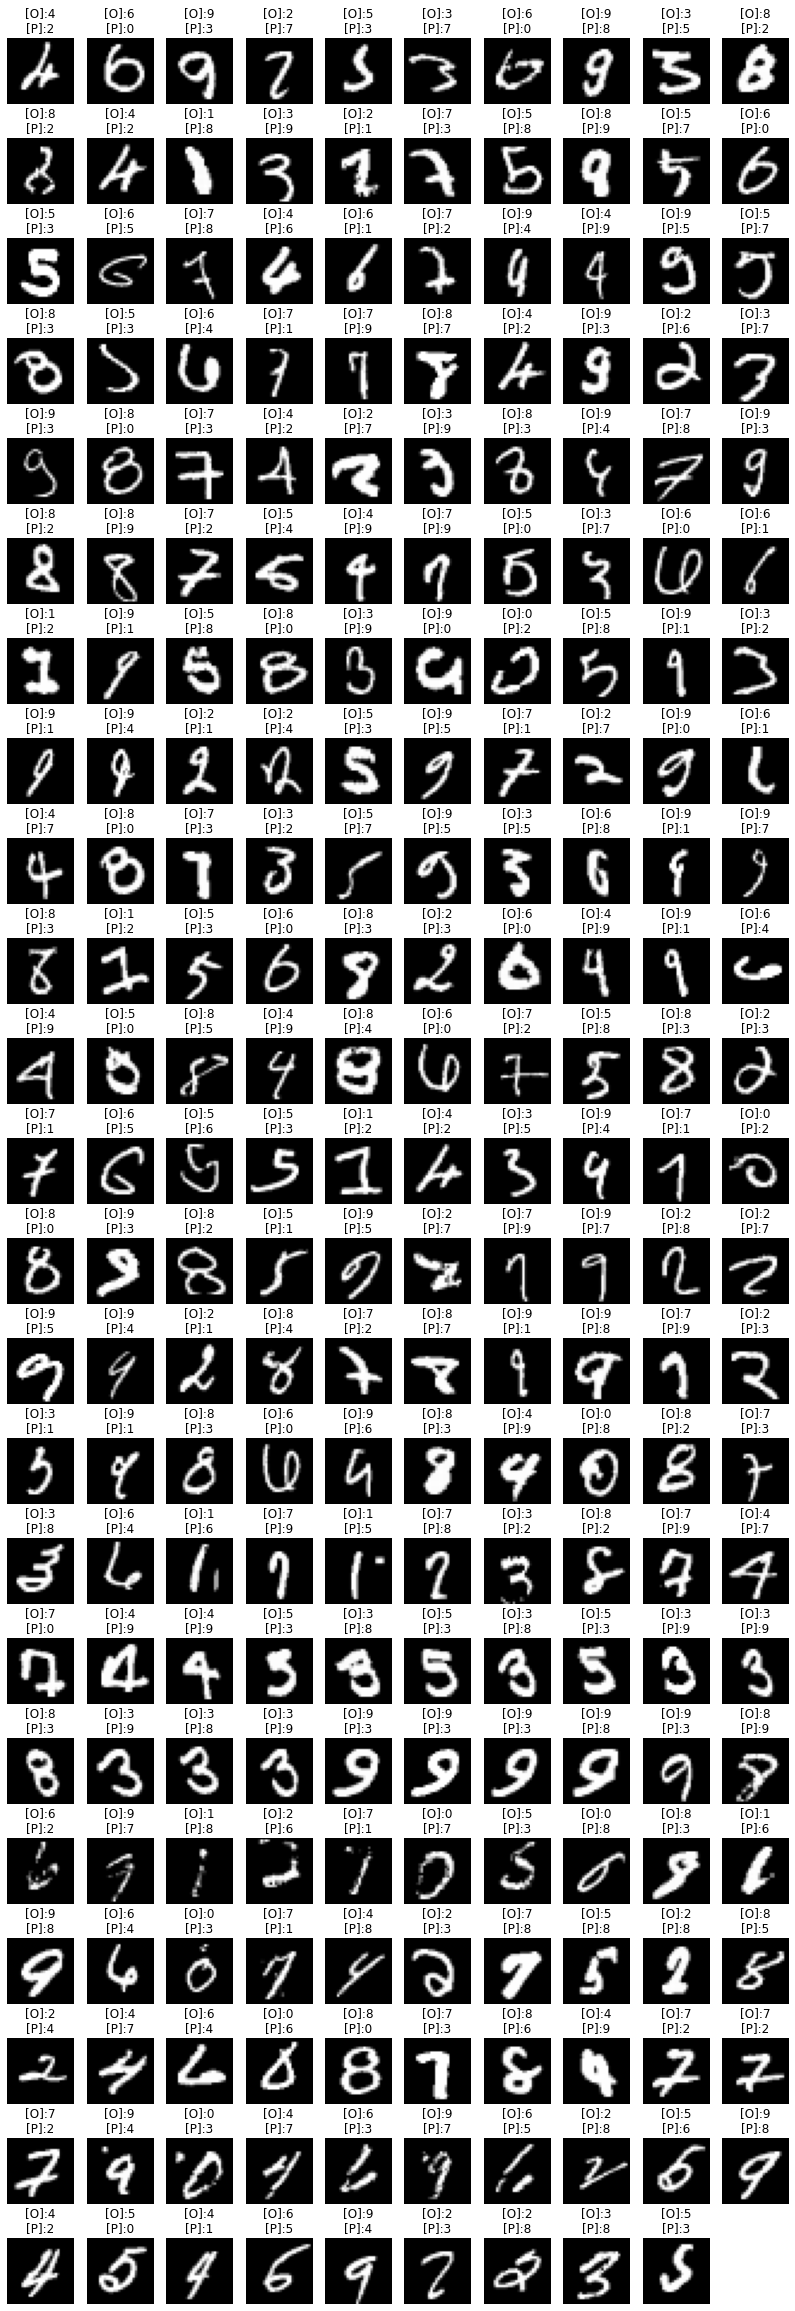

In [37]:
import numpy as np
import matplotlib.pyplot as plt
idx = np.nonzero(y_test != pre)[0]
pre_false_label = y_test[idx]
pre_false_pre = pre[idx]
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(pre_false_label[i], pre_false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i], cmap="gray")

In [ ]:
# 手動儲存: model.save("mnist.h5")
# 讀取模型: 不用做compile, 你可以繼續fit/evaluate/predict
import os
from tensorflow.keras.models import load_model
if os.path.exists("mnist.h5"):
    print("Already exists!")
    model = load_model("mnist.h5")
else:
    print("Not exists!")
    layers = [
        Dense(128, activation="relu", input_dim=784),
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=CategoricalCrossentropy(),
        optimizer="adam",
        metrics=["accuracy"])
model.summary()